# Outliers
_______________________________________________________________________________________________________________________________

This notebook contains the outliers project from Udacity's Intro to Machine Learning course.

In [27]:
#!/usr/bin/python

from operator import itemgetter

def outlierCleaner(predictions, ages, net_worths):
    """
        Clean away the 10% of points that have the largest
        residual errors (difference between the prediction
        and the actual net worth).

        Return a list of tuples named cleaned_data where 
        each tuple is of the form (age, net_worth, error).
    """
    
    split = int(9/10. * len(ages))
    
    errors = [pred - net_worth for pred, net_worth in zip(predictions, net_worths)]
    data = [(age, net_worth, error) for age, net_worth, error in zip(ages, net_worths, errors)]
 
    sorted_data = sorted(data,key=itemgetter(2))
    
    cleaned_data = sorted_data[:split]

    
    return cleaned_data

### Regression with and without outlier removal

training time: 0.0 s
r-squared:	0.878262470366
slope:		[[ 5.07793064]]
intercept:	[ 25.21002155]


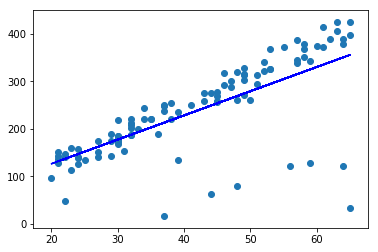

r-squared:	0.983287910122
slope:		[[ 6.37736798]]
intercept:	[-7.15980733]


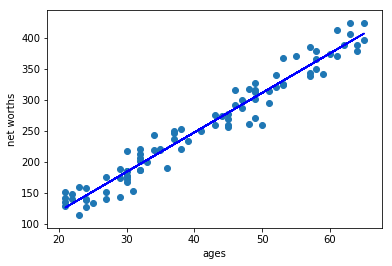

In [30]:
#!/usr/bin/python

import random
import numpy
import matplotlib.pyplot as plt
import pickle

from sklearn.linear_model import LinearRegression
from time import time


### load up some practice data with outliers in it
ages = pickle.load( open("practice_outliers_ages.pkl", "r") )
net_worths = pickle.load( open("practice_outliers_net_worths.pkl", "r") )



### ages and net_worths need to be reshaped into 2D numpy arrays
### second argument of reshape command is a tuple of integers: (n_rows, n_columns)
### by convention, n_rows is the number of data points
### and n_columns is the number of features
ages       = numpy.reshape( numpy.array(ages), (len(ages), 1))
net_worths = numpy.reshape( numpy.array(net_worths), (len(net_worths), 1))
from sklearn.cross_validation import train_test_split
ages_train, ages_test, net_worths_train, net_worths_test = train_test_split(ages, net_worths, test_size=0.1, random_state=42)

### fill in a regression here!  Name the regression object reg so that
### the plotting code below works, and you can see what your regression looks like

# Generate Classifier
reg = LinearRegression()

# Train the Classifier
t0 = time()
reg.fit(ages_train, net_worths_train)
print "training time:", round(time()-t0, 3), "s"

# Print the statistics
print 'r-squared:\t' + str(reg.score(ages_test, net_worths_test))
print 'slope:\t\t', reg.coef_
print 'intercept:\t', reg.intercept_


try:
    plt.plot(ages, reg.predict(ages), color="blue")
except NameError:
    pass
plt.scatter(ages, net_worths)
plt.show()


### identify and remove the most outlier-y points
cleaned_data = outlierCleaner(reg.predict(ages), ages, net_worths)

# try:
#     predictions = reg.predict(ages_train)
#     cleaned_data = outlierCleaner( predictions, ages_train, net_worths_train )
# except NameError:
#     print "your regression object doesn't exist, or isn't name reg"
#     print "can't make predictions to use in identifying outliers"







### only run this code if cleaned_data is returning data
if len(cleaned_data) > 0:
    ages, net_worths, errors = zip(*cleaned_data)
    ages       = numpy.reshape( numpy.array(ages), (len(ages), 1))
    net_worths = numpy.reshape( numpy.array(net_worths), (len(net_worths), 1))

    ### refit your cleaned data!
    try:
        reg.fit(ages, net_worths)
        plt.plot(ages, reg.predict(ages), color="blue")
    except NameError:
        print "you don't seem to have regression imported/created,"
        print "   or else your regression object isn't named reg"
        print "   either way, only draw the scatter plot of the cleaned data"
    print 'r-squared:\t' + str(reg.score(ages_test, net_worths_test))
    print 'slope:\t\t', reg.coef_
    print 'intercept:\t', reg.intercept_
    plt.scatter(ages, net_worths)
    plt.xlabel("ages")
    plt.ylabel("net worths")
    plt.show()

else:
    print "outlierCleaner() is returning an empty list, no refitting to be done"
    print len(cleaned_data)



### Enron Outlier Removal

The dataset used above was already prepared - most of the outliers were already removed 

[(1111258, 'SKILLING JEFFREY K'), (1072321, 'LAY KENNETH L')]


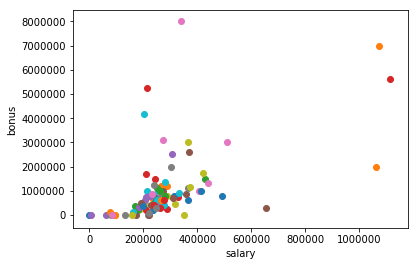

In [49]:
#!/usr/bin/python

import pickle
import sys
import matplotlib.pyplot
sys.path.append("../tools/")
from feature_format import featureFormat, targetFeatureSplit


### read in data dictionary, convert to numpy array
data_dict = pickle.load( open("../final_project/final_project_dataset.pkl", "r") )
data_dict.pop('TOTAL', None)
features = ["salary", "bonus"]
data = featureFormat(data_dict, features)

for point in data:
    salary = point[0]
    bonus = point[1]
    matplotlib.pyplot.scatter( salary, bonus )

## find the biggest outliers (salary)
dataset = [(val['salary'], person) for val, person in zip(data_dict.values(), data_dict.keys()) if val['salary'] != 'NaN']
L = sorted(dataset, key=itemgetter(0), reverse=True)
print L[0:2]
    
matplotlib.pyplot.xlabel("salary")
matplotlib.pyplot.ylabel("bonus")
matplotlib.pyplot.show()